<a href="https://colab.research.google.com/github/Zeke-Woods/Stats360Code/blob/main/HW1_Stats360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #1 - Fall 2021

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Find Cars Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Pirce ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>CarType, e.g. car, pickup, suv, etc.</li>
          <li>ForeignBased: Is the manufactor outside the US?</li>
          <li>Color</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
      &nbsp;
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [ ]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [ ]:
#@title Readin Data

# Reading data in using read.csv via Base 
FindCars <- read_csv("http://www.StatsClass.org/stat360/Datasets/FindCars.csv")

Rows: 8037 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Description, Make, Call For Price, CarType, ForeignBased, Engine, ...
dbl  (3): Year, Price, Miles


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The **head()** function can be used to see the first few lines of the dataset.  Similarly, the tail() function can be used to see the last few lines of a dataset.

In [ ]:
#@title View the first few rows of data
head(FindCars)

Description,Year,Make,Price,Call For Price,Miles,CarType,ForeignBased,Engine,DriveTrain,ExactColor,Color,Dealer,Location,Sold
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2010 Acura TL SH-AWD W/TECH W/HPT,2010,Acura,9995,No,151126,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,Black,Black,Eagle Motors WI,"Onalaska, WI",No
2019 Acura TLX SH-AWD,2019,Acura,35579,No,37506,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,White,White,Tom Kadlec Honda,"Rochester, MN",No
2019 Acura TLX A-Spec,2019,Acura,NA,Yes,9707,Car,Yes,3.5L V6 SOHC 24V,Auto FWD,White,White,Shakopee Chevrolet,"Shakopee, MN",No
2010 Acura TSX,2010,Acura,6500,No,165000,Car,Yes,2.4L L4 DOHC 16V,Auto FWD,Gray,Gray,Midway Auto Sales,"Rochester, MN",No
2020 Audi A3 S line Premium 45 TF,2020,Audi,38940,No,0,Car,Yes,2.0L L4 DOHC 16V,Auto 4WD/AWD,Mythos Blk Met,NA,Park Place Motor Cars,"Rochester, MN",No
2021 Audi A4 Premium,2021,Audi,43805,No,0,Car,Yes,4 2.0 L,Auto,Glacier White Metallic,White,Park Place Motor Cars,"Rochester, MN",No


## Basic Summary Statistics

1. Obtain the basic summary statistics for Price.  Provide an brief interpretation of the mean and standard deviation.

In [ ]:
(FindCars 
 %>% summarise(
                  Avg_Price = mean(Price, na.rm = TRUE),
                  Stdev_Price = sd(Price, na.rm = TRUE),
                  n_Price = n(),
                  Min_Price = min(Price, na.rm = TRUE),
                  Max_Price = max(Price, na.rm = TRUE)
                  )
                  
)

Avg_Price,Stdev_Price,n_Price,Min_Price,Max_Price
<dbl>,<dbl>,<int>,<dbl>,<dbl>
26763.68,17664.28,8037,595,239987


2. Create a histogram of Price.  Add a kernal density smoother to this histogram.  Briefly discuss what is learned about Price when considering this histogram.

Warning message:
“Removed 537 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 537 rows containing non-finite values (stat_density).”


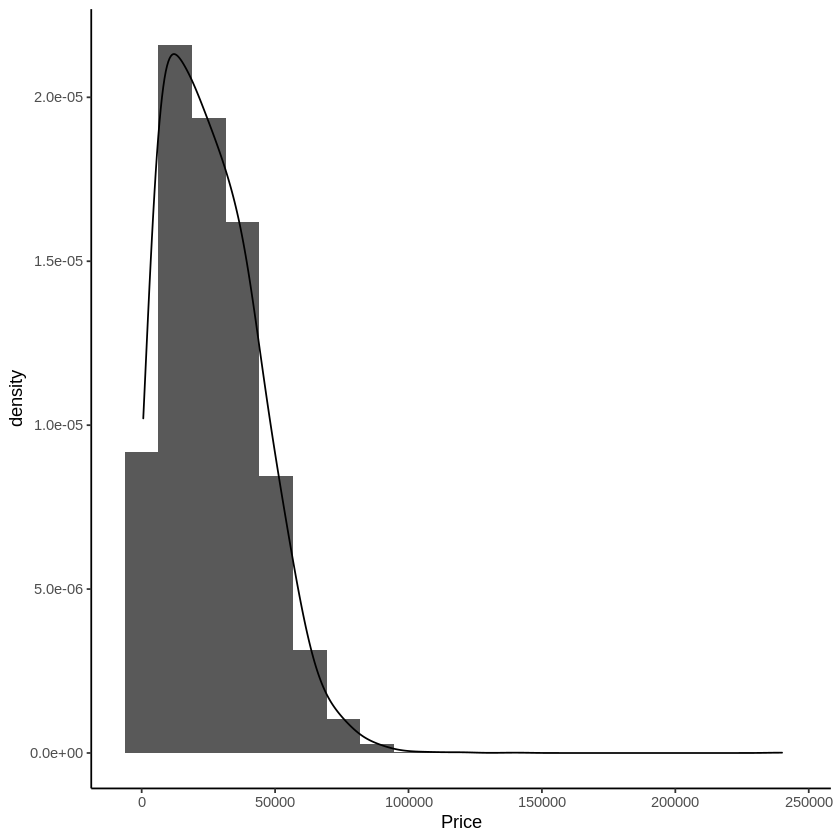

In [ ]:
 ggplot(data=FindCars, aes(x=Price)) + 
 geom_histogram(aes(y= ..density..), bins = 20) + 
  geom_density(adjust=2) +
  #stat_function(fun = dnorm, args = list(mean = c(6.68), sd = c(1.72))) + 

  theme_classic()

3. Create a CDF plot for Price.  This plot has a long tail on the upper end of this plot.  Why is this happening?

Warning message:
“Removed 537 rows containing non-finite values (stat_ecdf).”


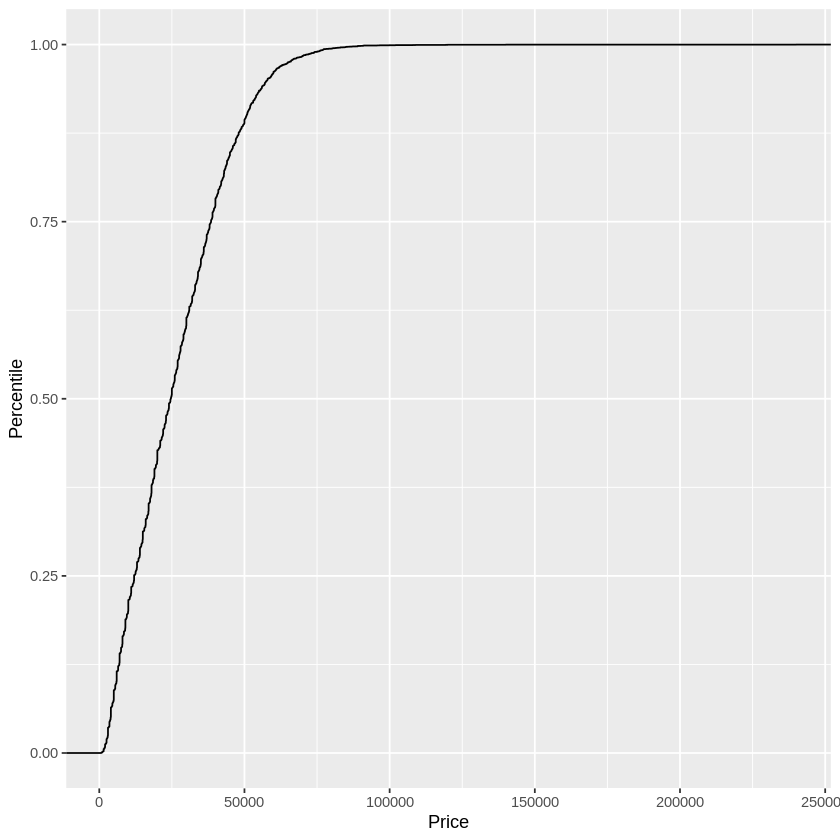

In [ ]:
ggplot(data=FindCars, aes(x=Price)) +
stat_ecdf() +
labs(y="Percentile")


4. Some believe Color impact Price.  For example, White cars tend to be cheaper?  Does this appear to be true?  Discuss briefly.

Warning message:
“Removed 544 rows containing non-finite values (stat_ecdf).”


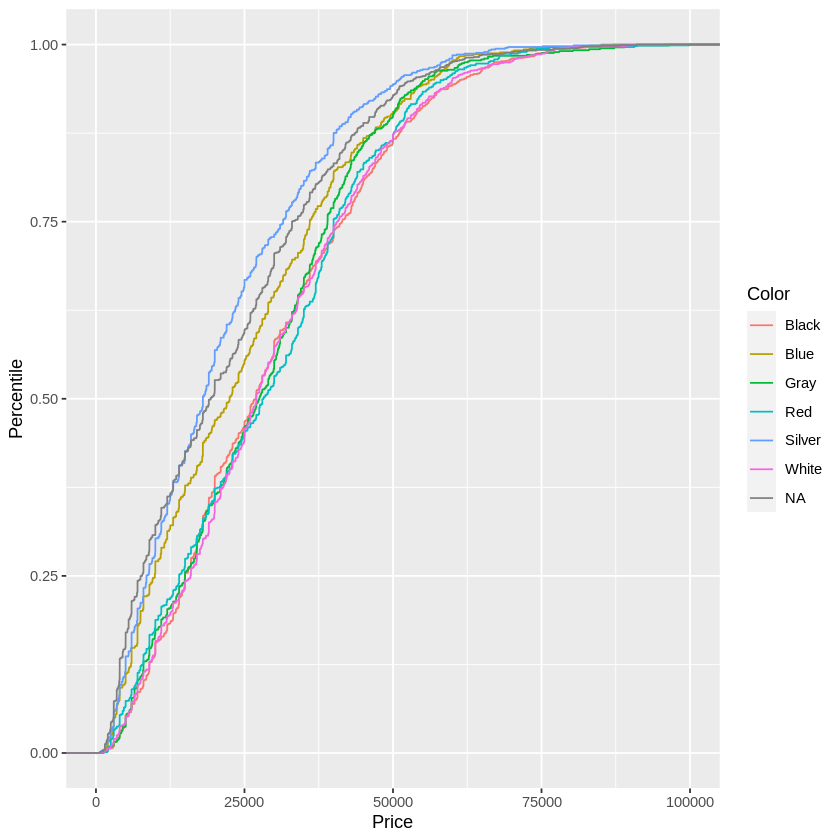

In [ ]:


ggplot(data=FindCars, aes(x=Price, color=Color)) +
stat_ecdf() +
labs(y="Percentile")+
scale_x_continuous(limits=c(0,100000))

5. Use descriptive summaries and graphs to investigate the effect of CarType on Price.  Briefly describe what is learned in this investigation.

6. Use descriptive summaries and graphs to investigate the effect of ForeignBased on Price.  Briefly describe what is learned in this investigation.

7. Which predictor variable, CarType or ForeignBased, appears to have more effect on Price?  Briefly discuss.